In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar DataFrame
df = pd.read_csv("final_reviews.csv")  # solo si no se ha cargado
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41056 entries, 0 to 41055
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hotel_Name        41056 non-null  object
 1   Review Id         41056 non-null  int64 
 2   User Location     23151 non-null  object
 3   User Is Verified  41056 non-null  object
 4   Rating            41056 non-null  int64 
 5   Published Date    41056 non-null  object
 6   Language          41056 non-null  object
 7   Review Title      41047 non-null  object
 8   Review Text       41056 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.8+ MB
None


,Hotel_Name,Review Id,User Location,User Is Verified,Rating,Published Date,Language,Review Title,Review Text
0,100 luxry,979285756,NaN,No,4,2024-11-09,es,A great place to share a spectacular night wit...,a very comfortable place;spacious;clean.Excell...
1,100 luxry,906758315,NaN,No,5,2023-07-30,es,"Incredible Spanish dinner, super recommended",The room was decorated very beautiful from adm...
2,100 luxry,906479966,NaN,No,5,2023-07-29,es,Excellent service,The bed is very comfortable;suitable for sleep...
3,100 luxry,895423330,NaN,No,3,2023-06-16,es,Good Hotel for Short Travel,The attention of all those who work at the hot...
4,100 luxry,890106560,Barranquilla,No,5,2023-05-12,es,Super recommended.,spectacular attention.The first rooms.very com...
...,...,...,...,...,...,...,...,...,...
41051,york luxury,795195801,Los Angeles,No,1,2021-07-02,en,terrible travel experience at york luxury suit...,terrible travel experience at york luxury suit...
41052,york luxury,786237852,NaN,No,5,2021-04-10,en,york luxury suites experience,the whole staff is just so helpful and always ...
41053,york luxury,784518846,NaN,No,5,2021-03-14,en,excellent hotel,loved our experience here. the rooms and other...
41054,york luxury,780224454,NaN,No,5,2020-12-30,en,york luxury suites,it was really nice. the pool and restaurant ar...


In [3]:
# Asegurar de que la columna de fecha esté en formato datetime
df['fecha'] = pd.to_datetime(df['Published Date'])
df['Year_Month'] = df['fecha'].dt.to_period('M')  # Agrupación mensual
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41056 entries, 0 to 41055
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hotel_Name        41056 non-null  object        
 1   Review Id         41056 non-null  int64         
 2   User Location     23151 non-null  object        
 3   User Is Verified  41056 non-null  object        
 4   Rating            41056 non-null  int64         
 5   Published Date    41056 non-null  object        
 6   Language          41056 non-null  object        
 7   Review Title      41047 non-null  object        
 8   Review Text       41056 non-null  object        
 9   fecha             41056 non-null  datetime64[ns]
 10  Year_Month        41056 non-null  period[M]     
dtypes: datetime64[ns](1), int64(2), object(7), period[M](1)
memory usage: 3.4+ MB
None


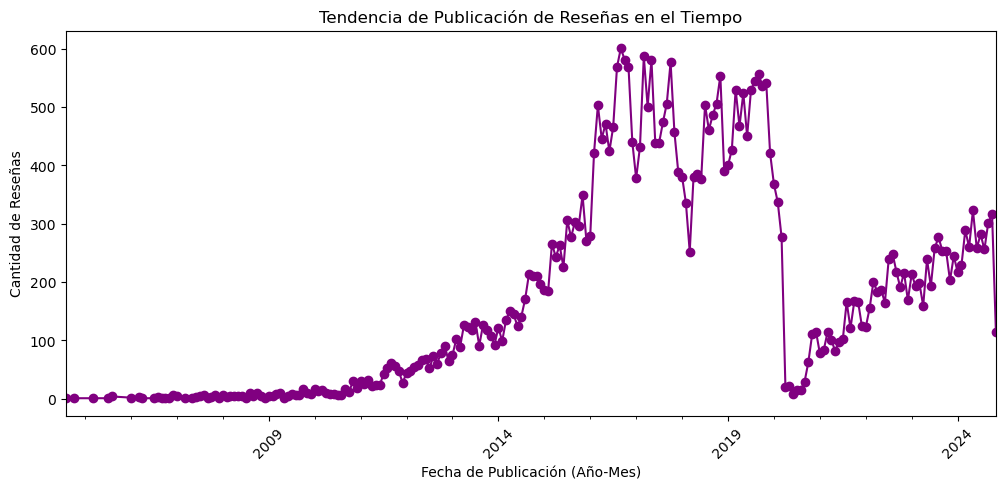

In [4]:
# Análisis de Fecha de Publicación

# Graficar la tendencia de publicaciones
plt.figure(figsize=(12,5))
df["Year_Month"].value_counts().sort_index().plot(kind="line", marker="o", color="purple")
plt.xlabel("Fecha de Publicación (Año-Mes)")
plt.ylabel("Cantidad de Reseñas")
plt.title("Tendencia de Publicación de Reseñas en el Tiempo")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Calcular el total de reseñas negativas
# Verificar si la columna 'Rating' existe y está en el tipo correcto
print(df['Rating'].unique())  # opcional: para verificar valores únicos

# Cuantificar las reseñas por calificación
conteo_rating = df['Rating'].value_counts().sort_index()

# Mostrar resultados
print("Cantidad de reseñas por calificación:")
print(conteo_rating)

[4 5 3 1 2]
Cantidad de reseñas por calificación:
Rating
1     1153
2     1185
3     2954
4     9281
5    26483
Name: count, dtype: int64


In [6]:
# Filtrar reseñas negativas
# Definir rango de fechas
fecha_inicio = '2020-01-01'
fecha_fin = '2024-10-30'

# Filtrar reseñas negativas dentro del rango de fechas
df_negativas = df[
    df['Rating'].isin([1, 2, 3]) &
    (df['fecha'] >= fecha_inicio) &
    (df['fecha'] <= fecha_fin)
]

# Ordenar cronológicamente
df_negativas = df_negativas.sort_values('fecha')
df_negativas

,Hotel_Name,Review Id,User Location,User Is Verified,Rating,Published Date,Language,Review Title,Review Text,fecha,Year_Month
27616,click clack,736281463,NaN,No,3,2020-01-02,en,good hotel,the good: hotel is clean and trendy and in a v...,2020-01-02,2020-01
10144,hotel bogota 100,736296908,Bogota,No,2,2020-01-02,es,Nothing special,It is well located in the city\n\nhowever;The ...,2020-01-02,2020-01
30889,hilton garden inn bogota airport,736645364,NaN,No,2,2020-01-03,en,poor service,if you want a clean and comfortable hotel; sta...,2020-01-03,2020-01
4214,ghl hotel capital,736520333,NaN,No,3,2020-01-03,es,price-quality relationship,Good is breakfast ...\nThe hotel is clean ... ...,2020-01-03,2020-01
11706,hotel estelar la fontana,736863053,Sant Cugat del Valles,No,3,2020-01-04,es,There are better options,I went in a couple recently.\nGood things: ver...,2020-01-04,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
32932,hotel habitel prime,976773399,NaN,No,3,2024-10-26,en,upset,my experience was not good they gave me a room...,2024-10-26,2024-10
32324,hotel estelar parque de la 93,976903904,NaN,No,2,2024-10-27,en,"the bed good but the breakfast veryyyy bad, ev...",the bed was good but the breakfast veryyyy bad...,2024-10-27,2024-10
29471,grand hyatt bogota,976957948,NaN,No,1,2024-10-28,en,not worth the trouble.,if booked for business purposes and you arrive...,2024-10-28,2024-10
32322,hotel estelar parque de la 93,977154421,NaN,No,1,2024-10-29,en,stolen cash in my hotel room,i was robbed in my room at the hotel estelar 9...,2024-10-29,2024-10


In [7]:
print(df_negativas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 27616 to 36409
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hotel_Name        1176 non-null   object        
 1   Review Id         1176 non-null   int64         
 2   User Location     597 non-null    object        
 3   User Is Verified  1176 non-null   object        
 4   Rating            1176 non-null   int64         
 5   Published Date    1176 non-null   object        
 6   Language          1176 non-null   object        
 7   Review Title      1176 non-null   object        
 8   Review Text       1176 non-null   object        
 9   fecha             1176 non-null   datetime64[ns]
 10  Year_Month        1176 non-null   period[M]     
dtypes: datetime64[ns](1), int64(2), object(7), period[M](1)
memory usage: 110.2+ KB
None


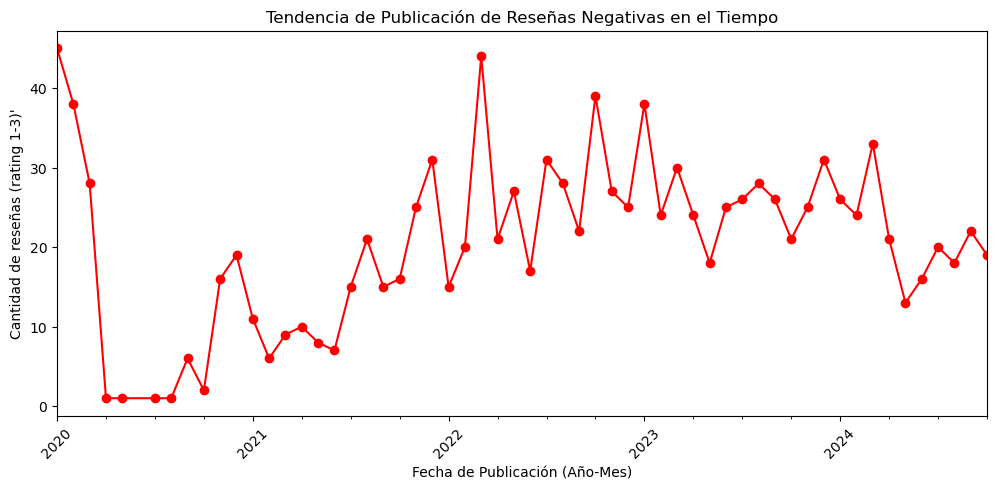

In [8]:
# Análisis de Fecha de Publicación de reseñas negativas

# Graficar la tendencia de publicaciones
plt.figure(figsize=(12,5))
df_negativas["Year_Month"].value_counts().sort_index().plot(kind="line", marker="o", color="red")
plt.xlabel("Fecha de Publicación (Año-Mes)")
plt.ylabel("Cantidad de reseñas (rating 1-3)'")
plt.title("Tendencia de Publicación de Reseñas Negativas en el Tiempo")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Agrupar por mes
df_series = df_negativas.groupby(pd.Grouper(key='fecha', freq='ME')).size().rename('cantidad')

# Mostrar los primeros valores (meses)
print(df_series.head(24))

fecha
2020-01-31    45
2020-02-29    38
2020-03-31    28
2020-04-30     1
2020-05-31     1
2020-06-30     0
2020-07-31     1
2020-08-31     1
2020-09-30     6
2020-10-31     2
2020-11-30    16
2020-12-31    19
2021-01-31    11
2021-02-28     6
2021-03-31     9
2021-04-30    10
2021-05-31     8
2021-06-30     7
2021-07-31    15
2021-08-31    21
2021-09-30    15
2021-10-31    16
2021-11-30    25
2021-12-31    31
Freq: ME, Name: cantidad, dtype: int64


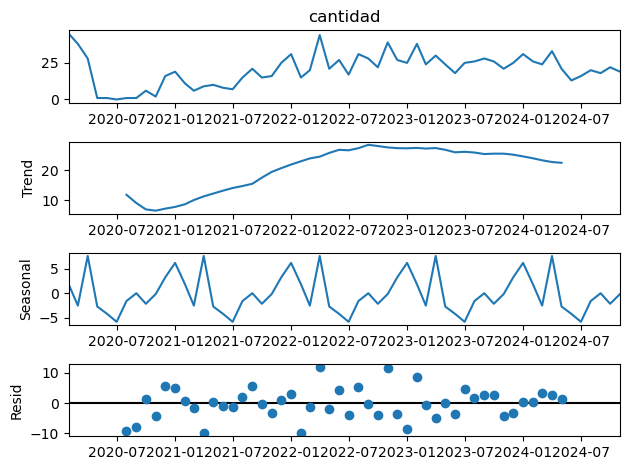

In [10]:
# Descomposición estacional
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_series, model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()


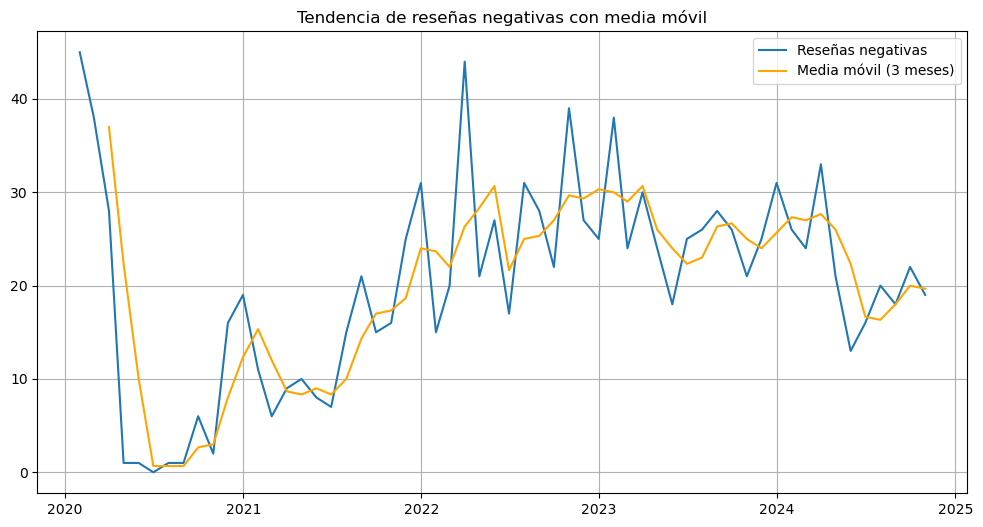

In [11]:
df_series_ma = df_series.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_series, label='Reseñas negativas')
plt.plot(df_series_ma, label='Media móvil (3 meses)', color='orange')
plt.legend()
plt.title('Tendencia de reseñas negativas con media móvil')
plt.grid(True)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8388\1318627844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='promedio', data=prom_mensual, palette='viridis')


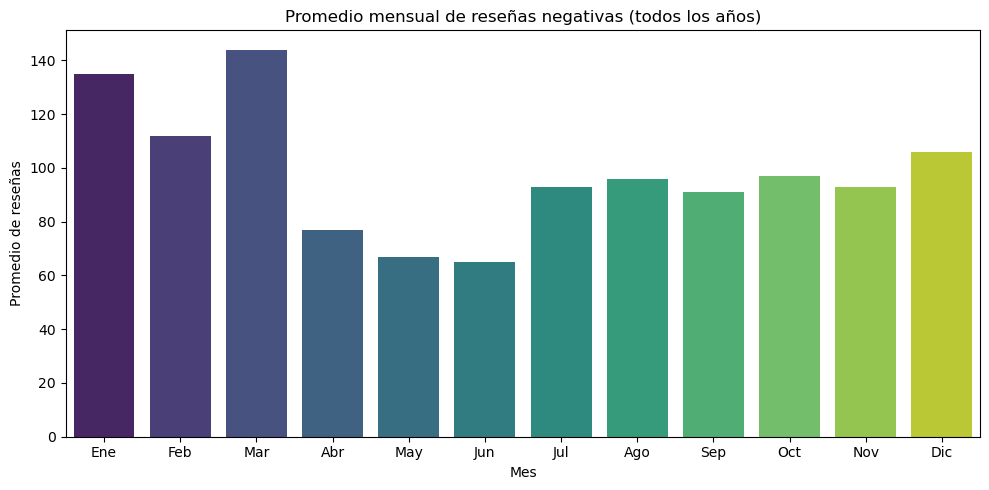

In [12]:
df_negativas['mes'] = df_negativas['fecha'].dt.month
prom_mensual = df_negativas.groupby('mes').size().reset_index(name='promedio')

plt.figure(figsize=(10,5))
sns.barplot(x='mes', y='promedio', data=prom_mensual, palette='viridis')
plt.title('Promedio mensual de reseñas negativas (todos los años)')
plt.xlabel('Mes')
plt.ylabel('Promedio de reseñas')
plt.xticks(ticks=range(0,12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.tight_layout()
plt.show()


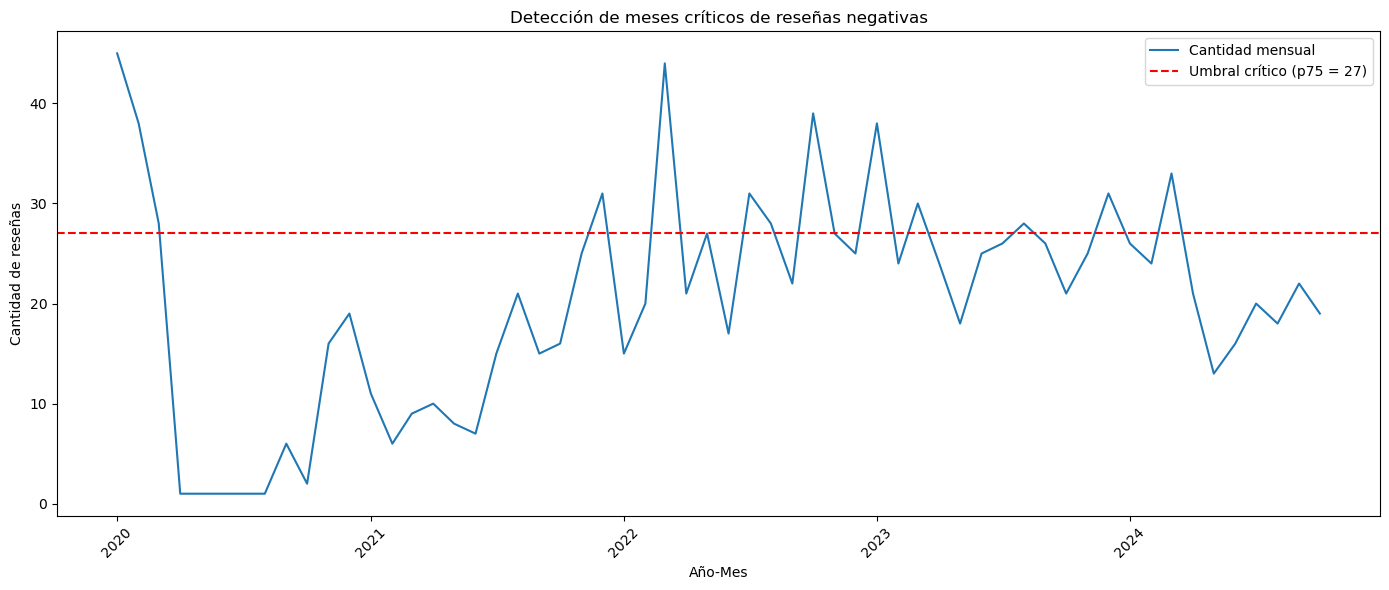

In [21]:
# Crear columna 'Year_Month' como datetime
df_negativas['Year_Month'] = pd.to_datetime(df_negativas['fecha']).dt.to_period('M').dt.to_timestamp()

# Agrupar por mes y contar cantidad de reseñas negativas
mensual = df_negativas.groupby('Year_Month').size().reset_index(name='cantidad')

# Calcular el umbral percentil 75
umbral = mensual['cantidad'].quantile(0.75)

# Visualización
plt.figure(figsize=(14,6))
sns.lineplot(data=mensual, x='Year_Month', y='cantidad', label='Cantidad mensual')
plt.axhline(umbral, color='red', linestyle='--', label=f'Umbral crítico (p75 = {int(umbral)})')
plt.title('Detección de meses críticos de reseñas negativas')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de reseñas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print(df_negativas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 27616 to 36409
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hotel_Name        1176 non-null   object        
 1   Review Id         1176 non-null   int64         
 2   User Location     597 non-null    object        
 3   User Is Verified  1176 non-null   object        
 4   Rating            1176 non-null   int64         
 5   Published Date    1176 non-null   object        
 6   Language          1176 non-null   object        
 7   Review Title      1176 non-null   object        
 8   Review Text       1176 non-null   object        
 9   fecha             1176 non-null   datetime64[ns]
 10  Year_Month        1176 non-null   datetime64[ns]
 11  mes               1176 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(7)
memory usage: 114.8+ KB
None


In [25]:
# Gráficas mensuales de reseñas negativas por hotel, permitiendo identificar cuáles presentan patrones anómalos o señales de alerta.

# Agrupar por Hotel_Name y Year_Month
# Agrupar por hotel y mes
mensual_hotel = (
    df_negativas.groupby(['Hotel_Name', 'Year_Month'])
    .size()
    .reset_index(name='cantidad')
)

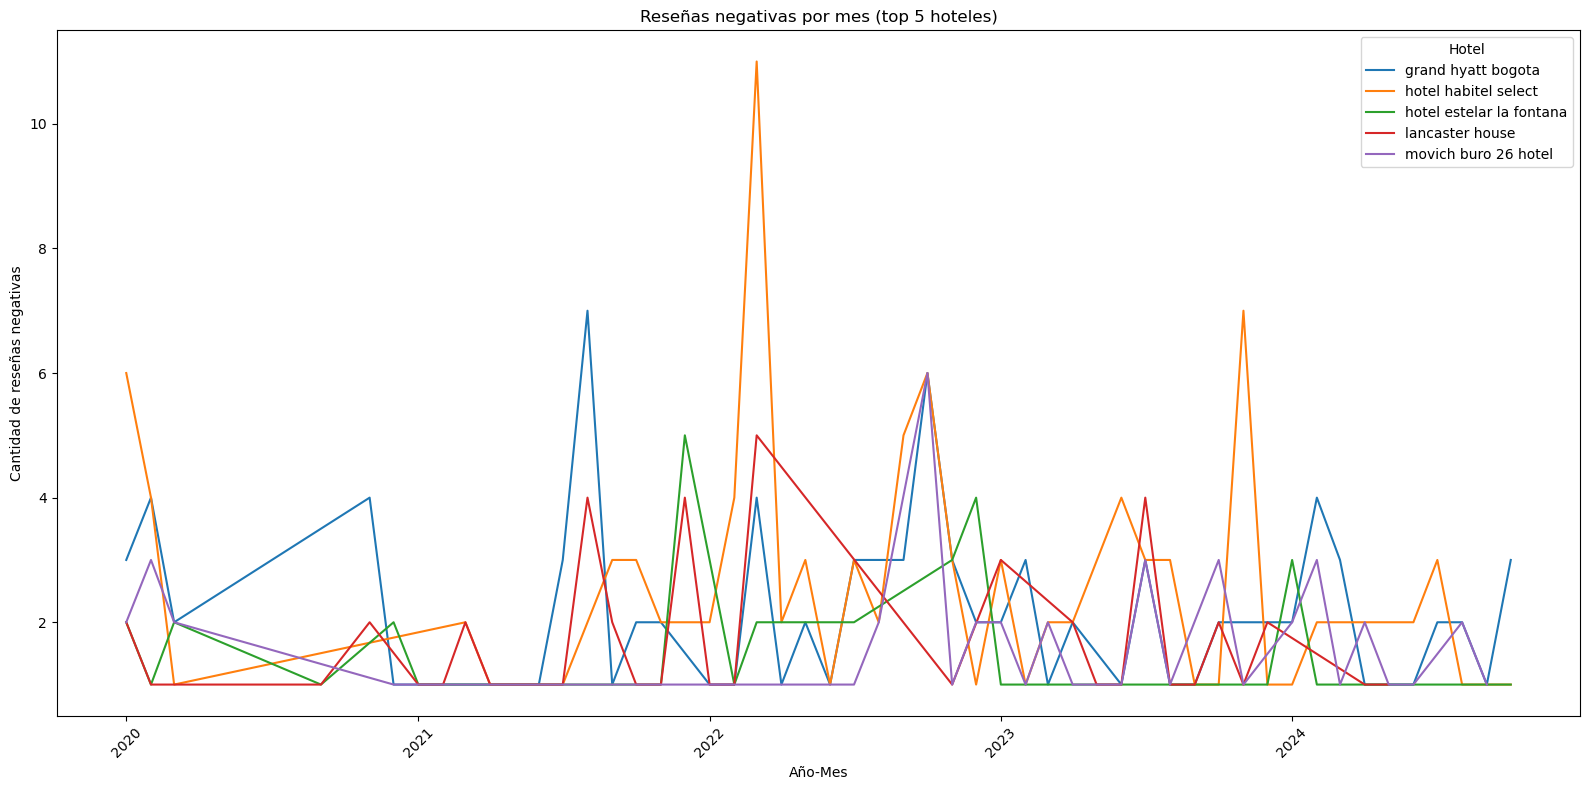

In [28]:
# Visualizar por hotel (ejemplo con los 5 más frecuentes)
hoteles_top = mensual_hotel['Hotel_Name'].value_counts().head(5).index

plt.figure(figsize=(16, 8))
for hotel in hoteles_top:
    datos = mensual_hotel[ mensual_hotel['Hotel_Name'] == hotel ]
    sns.lineplot(data=datos, x='Year_Month', y='cantidad', label=hotel)

plt.title('Reseñas negativas por mes (top 5 hoteles)')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de reseñas negativas')
plt.legend(title='Hotel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

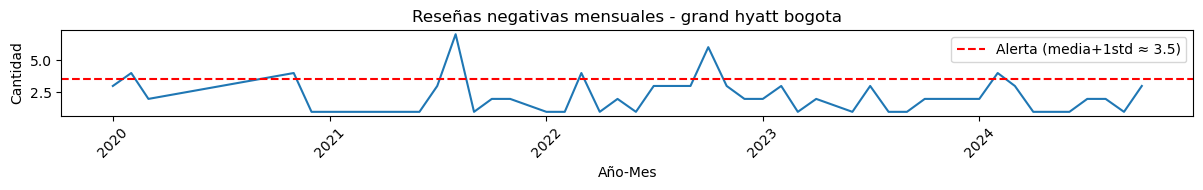

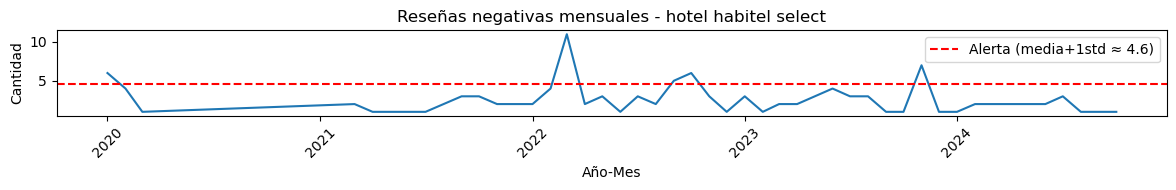

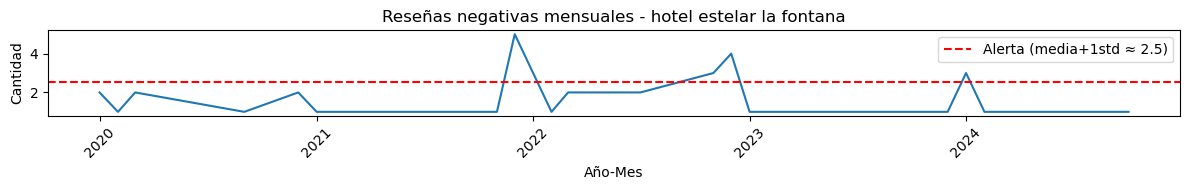

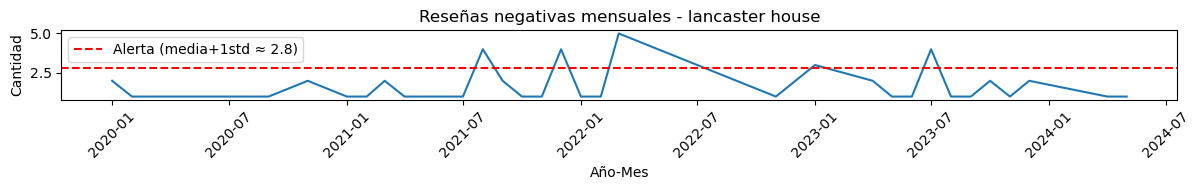

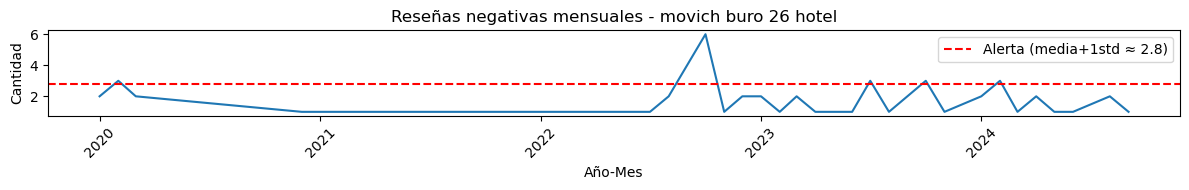

In [30]:
# Visualizar individualmente con alertas: generar un gráfico por hotel, añadiendo una línea de umbral 
# (por ejemplo, 1 desviación estándar por encima del promedio)
for hotel in hoteles_top:
    datos = mensual_hotel[ mensual_hotel['Hotel_Name'] == hotel ]
    media = datos['cantidad'].mean()
    std = datos['cantidad'].std()
    umbral = media + std
    
    plt.figure(figsize=(12, 2))
    sns.lineplot(data=datos, x='Year_Month', y='cantidad')
    plt.axhline(umbral, color='red', linestyle='--', label=f'Alerta (media+1std ≈ {umbral:.1f})')
    plt.title(f'Reseñas negativas mensuales - {hotel}')
    plt.xlabel('Año-Mes')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# visualizar un hotel específico

# Filtrar reseñas negativas del hotel "100 luxry"
hotel = "hotel estelar la fontana"
df_neg_hotel = df_negativas[(df_negativas['Hotel_Name'].str.lower() == hotel.lower())].copy()

# Agrupar por año-mes y contar
mensual = df_neg_hotel.groupby('año_mes').size().reset_index(name='cantidad')
mensual['año_mes'] = mensual['año_mes'].dt.to_timestamp()

# Calcular umbral de alerta
media = mensual['cantidad'].mean()
std = mensual['cantidad'].std()
umbral = media + std

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=mensual, x='año_mes', y='cantidad', marker='o', label='Reseñas negativas')
plt.axhline(umbral, color='red', linestyle='--', label=f'Alerta (media + 1 std ≈ {umbral:.1f})')
plt.title(f'Reseñas negativas mensuales - {hotel}')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
